<a href="https://colab.research.google.com/github/emredeveloper/Machine-Learning-Codes/blob/main/Sigmoid_Relu_Swish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

# Sabit veri kümesi oluşturma
import numpy as np

# Sabit veri kümesi oluşturma
X = np.array([[1, 2, 3, 4, 5],
              [2, 3, 4, 5, 6],
              [3, 4, 5, 6, 7],
              [4, 5, 6, 7, 8],
              [5, 6, 7, 8, 9],
              [6, 7, 8, 9, 10],
              [7, 8, 9, 10, 11],
              [8, 9, 10, 11, 12],
              [9, 10, 11, 12, 13],
              [10, 11, 12, 13, 14]])

y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])



In [46]:
# Eğitim ve test verilerini bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sigmoid aktivasyon fonksiyonu ile model oluşturma
sigmoid_model = Sequential()
sigmoid_model.add(Dense(64, input_shape=(5,)))
sigmoid_model.add(Activation('sigmoid'))
sigmoid_model.add(Dense(1))
sigmoid_model.add(Activation('sigmoid'))

# ReLU aktivasyon fonksiyonu ile model oluşturma
relu_model = Sequential()
relu_model.add(Dense(64, input_shape=(5,)))
relu_model.add(Activation('relu'))
relu_model.add(Dense(1))
relu_model.add(Activation('sigmoid'))  # Çıkış katmanında yine sigmoid kullanıyoruz

In [47]:
import keras

In [48]:
def swish(x):
    return x * keras.activations.sigmoid(x)

swish_model = Sequential()
swish_model.add(Dense(64, input_shape=(5,)))
swish_model.add(Activation(swish))
swish_model.add(Dense(1))
swish_model.add(Activation('sigmoid'))  # Çıkış katmanında yine sigmoid kullanıyoruz

# Modelleri derleme ve yapılandırma
sigmoid_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
relu_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
swish_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
# Modelleri eğitme
sigmoid_model.fit(X_train, y_train, epochs=10, batch_size=32)
relu_model.fit(X_train, y_train, epochs=10, batch_size=32)
swish_model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.7038 - accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 17ms/step - loss: 0.6952 - accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 18ms/step - loss: 0.6875 - accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 14ms/step - loss: 0.6805 - accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 19ms/step - loss: 0.6741 - accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 16ms/step - loss: 0.6681 - accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 13ms/step - loss: 0.6624 - accuracy: 0.6250
Epoch 8/10
1/1 [==============================] - 0s 13ms/step - loss: 0.6569 - accuracy: 0.6250
Epoch 9/10
1/1 [==============================] - 0s 14ms/step - loss: 0.6515 - accuracy: 0.6250
Epoch 10/10
1/1 [==============================] - 0s 14ms/step - loss: 0.6462 - accuracy: 0.6250
Epoch 1/10
1/1 [===============

In [50]:
# Modelleri test verileriyle değerlendirme
sigmoid_pred = sigmoid_model.predict(X_test)
relu_pred = relu_model.predict(X_test)
swish_pred = swish_model.predict(X_test)

1/1 [==============================] - 0s 97ms/step


In [51]:
sigmoid_accuracy = accuracy_score(y_test, sigmoid_pred.round())
relu_accuracy = accuracy_score(y_test, relu_pred.round())
swish_accuracy = accuracy_score(y_test, swish_pred.round())

# Doğruluk değerlerini yazdırma
print("Sigmoid Model Doğruluk:", sigmoid_accuracy)
print("ReLU Model Doğruluk:", relu_accuracy)
print("Swish Model Doğruluk:", swish_accuracy)

Sigmoid Model Doğruluk: 1.0
ReLU Model Doğruluk: 0.5
Swish Model Doğruluk: 0.5


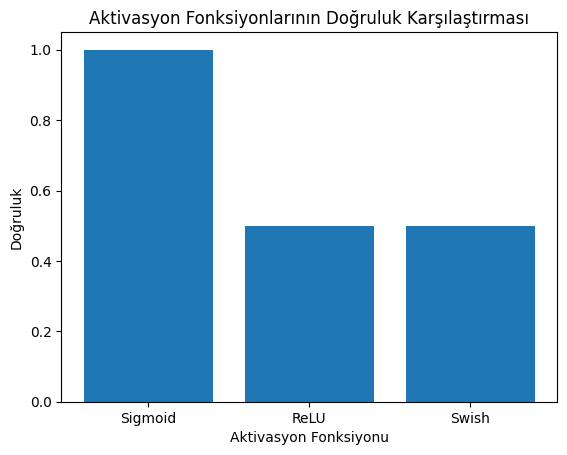

In [52]:
# Doğruluk değerlerini görselleştirme
plt.bar(['Sigmoid', 'ReLU', 'Swish'], [sigmoid_accuracy, relu_accuracy, swish_accuracy])
plt.xlabel('Aktivasyon Fonksiyonu')
plt.ylabel('Doğruluk')
plt.title('Aktivasyon Fonksiyonlarının Doğruluk Karşılaştırması')
plt.show()